In [114]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 第八週:作業一

# Automobile Data Set

In [115]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data')

In [116]:
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [117]:
column_names="symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price".split(',')

In [118]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data',names=column_names)

In [119]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


### 看車子"引擎大小"和"在城市開耗油量"的相關性

In [120]:
df[["engine-size","city-mpg"]].head()

,engine-size,city-mpg
0,130,21
1,130,21
2,152,19
3,109,24
4,136,18


In [121]:
engine_size=np.array(df["engine-size"])
city_mpg=np.array(df["city-mpg"])

In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
regr=LinearRegression()

In [124]:
engine_size=engine_size.reshape(205,1)

In [125]:
city_mpg=city_mpg.reshape(205,1)

In [126]:
regr.fit(engine_size,city_mpg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0, 0.5, 'city mpg')

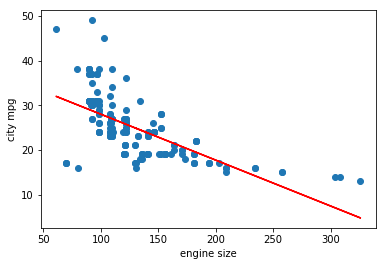

In [127]:
plt.scatter(engine_size,city_mpg)
plt.plot(engine_size,regr.predict(engine_size),'r')
plt.xlabel("engine size")
plt.ylabel("city mpg")

### 整體看起來引擎越小、在城市開的耗油量越大。
### 但在引擎較小時誤差較大。